# <h4> Teste de Conhecimento em Web Scraping e Análise de Dados com Python


## Questão 1

In [1]:
# pip install requests beautifulsoup4 pandas

<h4> O Reddit utiliza técnicas de carregamento dinâmico por meio de JavaScript para renderizar o conteúdo, assim utilizar a biblioteca estática Beautiful Soup, não é um método recomendado. Ao invés disso, optei em utiliar uma das funções do próprio redit que retorna a página em um arquivo JSON.

In [2]:
import requests
import openpyxl

# Definindo o subreddit alvo
subreddit = 'programming'

# Construindo a URL da página JSON das postagens top do subreddit
url = f'https://www.reddit.com/r/{subreddit}/top.json?t=all'

# Definindo um User-Agent para a requisição
headers = {
    'User-Agent': 'VirboxBot'
}

# Fazendo a requisição GET para a página JSON das postagens
response = requests.get(url, headers=headers)

# Verificando se a requisição foi bem-sucedida
if response.ok:
    # Convertendo a resposta JSON em um dicionário Python
    data = response.json()

    post_data = []

    # Iterando sobre as três primeiras postagens
    for post in data['data']['children'][:3]:  # Limitando a três postagens
        pdata = post['data']
        title = pdata['title']
        upvotes = pdata['ups']
        link = pdata.get('url_overridden_by_dest')
        post_data.append([title, upvotes, link])

    # Criando um novo arquivo de planilha Excel
    excel_filename = "programming_subreddit.xlsx"
    workbook = openpyxl.Workbook()
    sheet = workbook.active

    # Definindo os cabeçalhos das colunas
    sheet.append(['Title', 'Upvotes', 'Link'])

    # Preenchendo a planilha com os dados das postagens
    for post in post_data:
        sheet.append(post)

    # Salvando a planilha Excel
    workbook.save(excel_filename)
    print("Dados salvos com sucesso em", excel_filename)
else:
    print(f'Error {response.status_code}')


Dados salvos com sucesso em programming_subreddit.xlsx


## Questão 2

In [3]:
# Informações sobre filmes em um site de avaliações de filmes

filmes = [
    {"titulo": "O Senhor dos Anéis", "ano": 2001, "avaliacao": 8.8},
    {"titulo": "Matrix", "ano": 1999, "avaliacao": 9.3},
    {"titulo": "Interestelar", "ano": 2014, "avaliacao": 8.6}
]

In [4]:
# Lista de Avaliação dos filmes
avaliacoes = [filme["avaliacao"] for filme in filmes]

# Calculando a média das avaliações dos filmes:
media_avaliacoes = sum(avaliacoes) / len(avaliacoes)

# Encontrando o título do filme com a maior avaliação
filme_maior_avaliacao = max(filmes, key=lambda x: x["avaliacao"])

# Encontrando o ano de lançamento do filme com a menor avaliação
filme_menor_avaliacao = min(filmes, key=lambda x: x["avaliacao"])

print(f"A média das avaliações dos filmes: {media_avaliacoes:.2f}")
print(f"O título do filme com a maior avaliação: {filme_maior_avaliacao['titulo']}")
print(f"O ano de lançamento do filme com a menor avaliação: {filme_menor_avaliacao['ano']}")


A média das avaliações dos filmes: 8.90
O título do filme com a maior avaliação: Matrix
O ano de lançamento do filme com a menor avaliação: 2014


## Questão 3

In [5]:
# Importar as bibliotecas necessárias
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Carregar o conjunto de dados
data_path = 'C:/Users/dell/OneDrive/Documentos/projeto_hooklab/dados_compras.json'
data = pd.read_json(data_path)

# Visualizando essa base
data.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


In [6]:
# Verificar a presença de valores ausentes nos dados
print("Valores ausentes por coluna:\n",data.isnull().sum())

Valores ausentes por coluna:
 Login           0
Idade           0
Sexo            0
Item ID         0
Nome do Item    0
Valor           0
dtype: int64


In [7]:
# Identificar a quantidade total de compras realizadas
print("Quantidade total de compras realizadas:", data.shape[0])

Quantidade total de compras realizadas: 780


In [8]:
# Calcular a média, o valor mínimo e máximo gasto por compra
media_gasto_por_compra = data["Valor"].mean()
valor_minimo_gasto = data["Valor"].min()
valor_maximo_gasto = data["Valor"].max()

# Determinar o produto mais caro e o produto mais barato
produto_mais_caro = data[data["Valor"] == valor_maximo_gasto]["Nome do Item"].values[0]
produto_mais_barato = data[data["Valor"] == valor_minimo_gasto]["Nome do Item"].values[0]


print("Média gasto por compra:", media_gasto_por_compra)
print("Valor mínimo gasto:", valor_minimo_gasto)
print("Valor máximo gasto:", valor_maximo_gasto)
print("Produto mais caro:", produto_mais_caro)
print("Produto mais barato:", produto_mais_barato)

Média gasto por compra: 2.9311923076923074
Valor mínimo gasto: 1.03
Valor máximo gasto: 4.95
Produto mais caro: Orenmir
Produto mais barato: Hero Cane


## Visualização de dados

In [9]:
print(f"Dimensões da base de dados: {data.shape}")

Dimensões da base de dados: (780, 6)


In [10]:
print(f"Informações das features da base de dados: {data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Login         780 non-null    object 
 1   Idade         780 non-null    int64  
 2   Sexo          780 non-null    object 
 3   Item ID       780 non-null    int64  
 4   Nome do Item  780 non-null    object 
 5   Valor         780 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 36.7+ KB
Informações das features da base de dados: None


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,780.0,22.729487,6.930604,7.00,19.00,22.00,25.00,45.00
Item ID,780.0,91.293590,52.707537,0.00,44.00,91.00,135.00,183.00
Valor,780.0,2.931192,1.115780,1.03,1.96,2.88,3.91,4.95


In [12]:
def print_unique_col_values(data):
       for column in data:
            if data[column].dtypes !='object':
                print(f'{column}: {data[column].unique()}') 

In [13]:
print_unique_col_values(data)

Idade: [38 21 34 23 20 29 25 31 24 30 40 22 28 15 11 19 16 18 32  7 27 33 17 37
 13  9 35 14 12 26 45 39  8 42 36 10 43]
Item ID: [165 119 174  92  63  10 153 169 118  99  57  47  81  77  44  96 123  59
  91 177  78   3  11 183  65 132 106  49  45 155  37  48  90  13 171  25
   7 124  68  85 120  17 141  73 151  32  51 101 140  31  34   2  86  39
  28 160 134  83  38 158 110 122  54 105  87  23 144 128 175  46 150 152
 108 172 167 181  20 130 111 103  30 139 173  55 115  35  42   9  84 180
 102  53  18  74 126  50  62 125 121 129 149  12  71  14  58  27  52  66
 100 112  24  94 107   0 182  97  70  89   1 170  93 179  36  75 143 137
 176 148 127 147 161 154 157 116  61 131  41 145  60 162 135   8  40  15
  29  72 114 117  79  88 104  95  64  98  33  76 146 166  56  22  21  16
  67 133  69 159  82 113 164   6 163   5  19 168 136  80  26 142 178 156
 109  43   4]
Valor: [3.37 2.32 2.46 1.36 1.27 1.73 4.57 3.32 2.77 4.53 3.81 1.55 4.06 3.68
 4.77 1.14 1.65 3.71 4.89 2.33 1.79 2.52 2.36 1.

Text(0.5, 1.0, 'Missing values map')

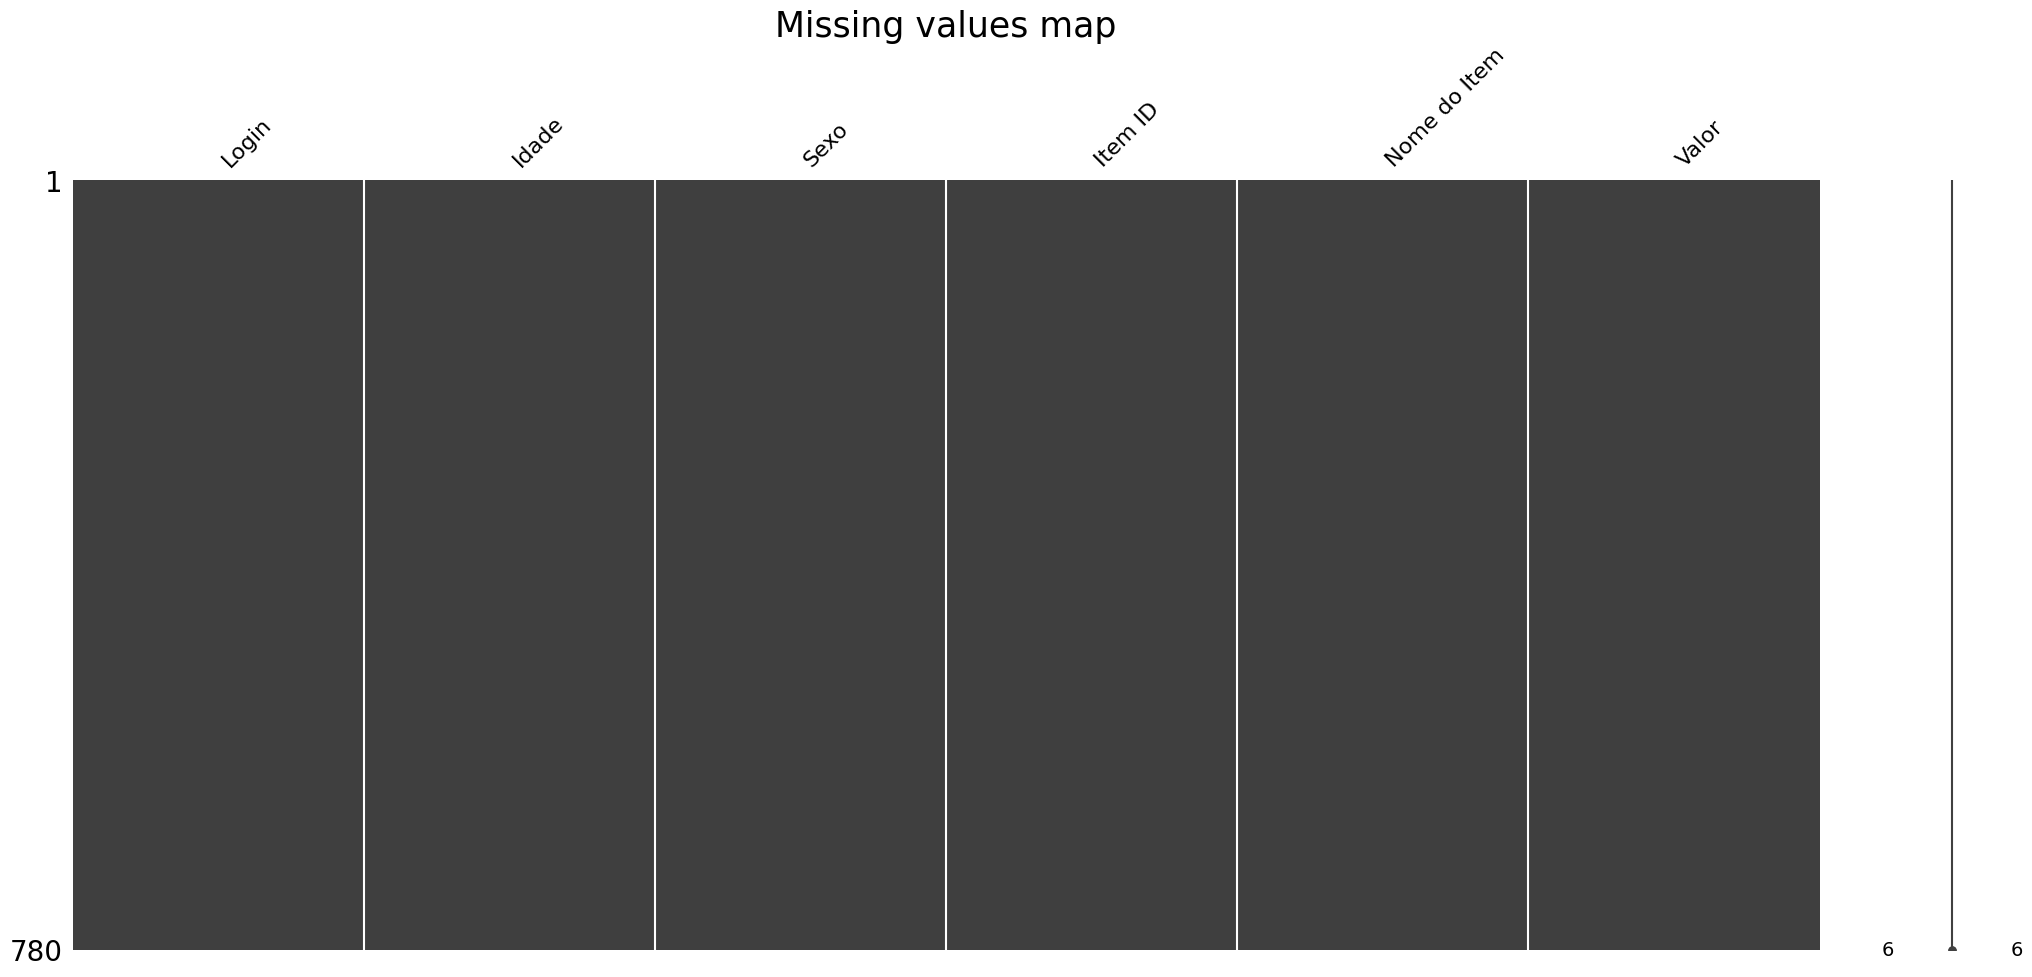

In [14]:
# Analisando missing data nos dados já tratados por Havard
import missingno as msno

msno.matrix(data)
plt.title("Missing values map", fontsize=25)

C:\Users\dell\AppData\Local\Temp\ipykernel_7292\4277926796.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


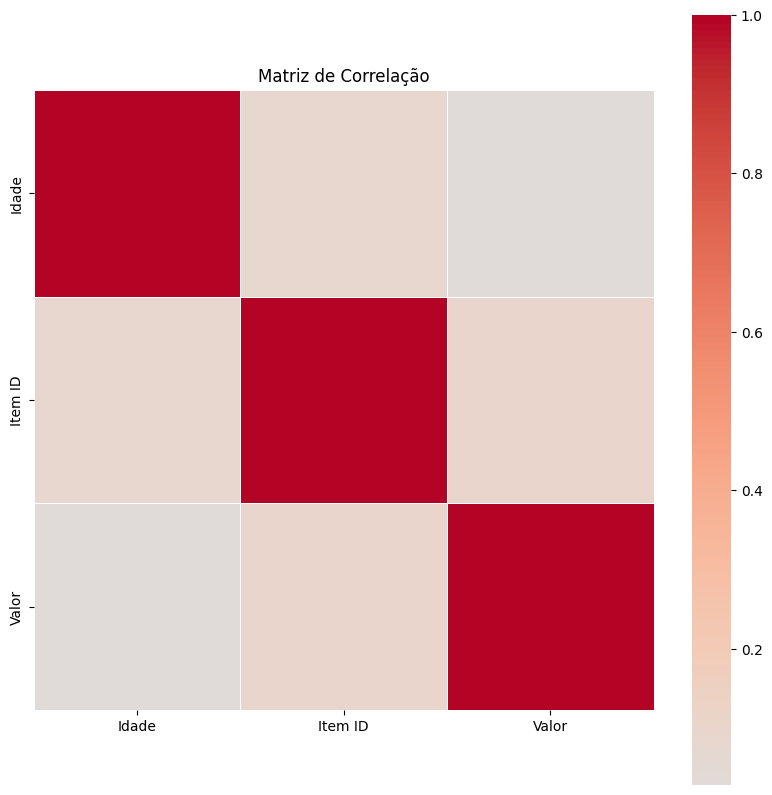

In [15]:
# Calculando a matriz de correlação entre as colunas
corr_matrix = data.corr()

# Configurando o tamanho do plot
plt.figure(figsize=(10, 10))

# Plotando a matriz de correlação
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, center=0, linewidths=0.5)

# Adicionando um título
plt.title('Matriz de Correlação')

# Exibindo o plot
plt.show()


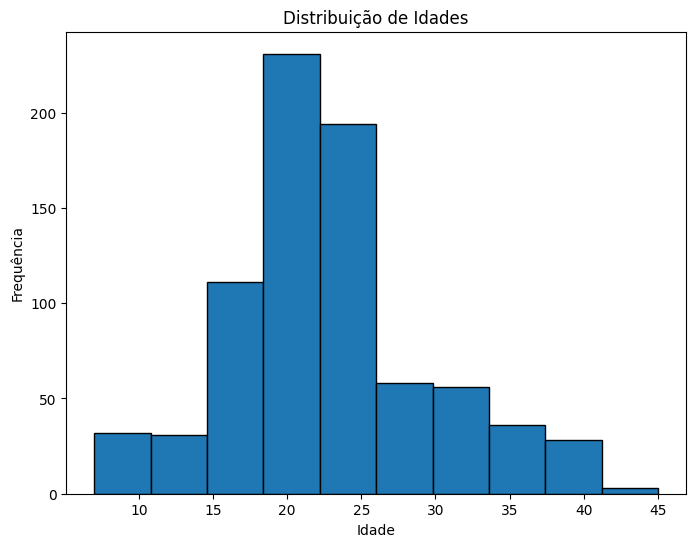

In [16]:
# Histograma de Idades:
plt.figure(figsize=(8, 6))
plt.hist(data["Idade"], bins=10, edgecolor="black")
plt.title("Distribuição de Idades")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

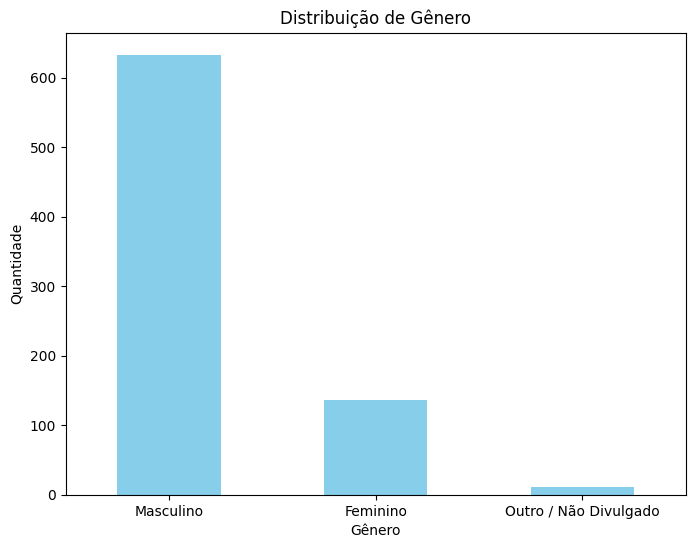

In [17]:
# Gráfico de Barras para Gênero:

plt.figure(figsize=(8, 6))
data["Sexo"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribuição de Gênero")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)
plt.show()


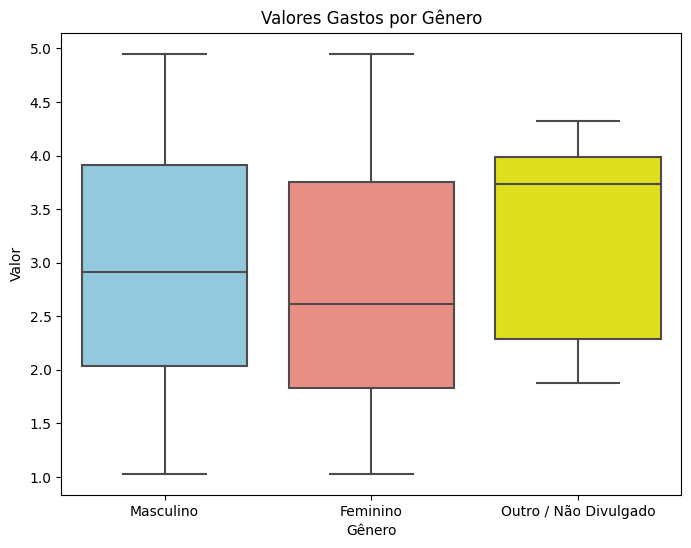

In [18]:
# Boxplot de Valores Gastos por Gênero:
import seaborn as sns

# Define a paleta de cores
colors = {"Masculino": "skyblue", "Feminino": "salmon","Outro / Não Divulgado":"yellow"}

# Cria o boxplot com cores personalizadas
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sexo", y="Valor", data=data, palette=colors)
plt.title("Valores Gastos por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Valor")
plt.show()


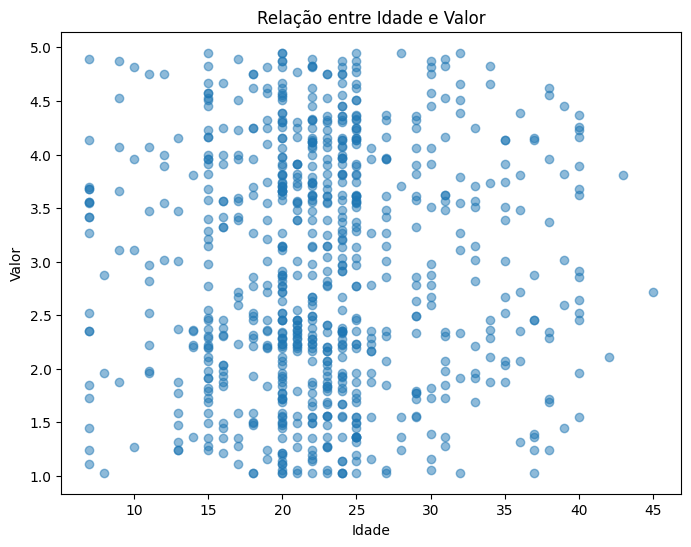

In [19]:
# Gráfico de Dispersão entre Idade e Valor:

plt.figure(figsize=(8, 6))
plt.scatter(data["Idade"], data["Valor"], alpha=0.5)
plt.title("Relação entre Idade e Valor")
plt.xlabel("Idade")
plt.ylabel("Valor")
plt.show()